<a href="https://colab.research.google.com/github/akashbalor123/Machine-Learning/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [135]:
car_data = pd.read_csv('/content/car data.csv')

In [136]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [137]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [138]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [139]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Seller_Type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [140]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

/tmp/ipython-input-3799276148.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
/tmp/ipython-input-3799276148.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
/tmp/ipython-input-3799276148.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)

In [141]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [142]:
X=car_data.drop(['Car_Name', 'Selling_Price'],axis=1)

In [143]:
y=car_data['Selling_Price']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [145]:
Lin_model=LinearRegression()
Lin_model.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred_test = Lin_model.predict(X_test)

In [147]:
y_pred_test

array([10.39222503,  0.71269634,  4.26367425,  4.89542882,  9.84484784,
        4.22631808,  7.1173891 ,  7.37327394,  0.1592961 ,  5.16712598,
        6.20624893,  6.17414198,  2.11880837,  7.74045843,  1.92235986,
        1.71406658,  2.02899942,  1.8536463 ,  9.35171759,  4.2546458 ,
        1.48996098,  9.14496453,  1.45846216,  9.63402658,  0.82165042,
        8.07898502,  1.53763892, -3.19873666,  4.22373915,  2.09526116,
        3.42865389,  3.72427545,  5.58001877,  7.75879392, -1.91563192,
        6.80980082,  8.20694812,  5.81047156,  6.15629896,  6.27493028,
       16.02197751,  2.07455343,  1.04886513, -0.45830577,  6.82090538,
        6.78567581,  0.98725428,  6.83257783, 14.31925066,  3.01359825,
        8.04481951, -0.89441322,  8.99139759,  1.14814903,  2.1191082 ,
       -0.82919712,  0.68456956, 10.02743111, -0.46773344, -2.43254957,
       10.0831552 ])

In [151]:
r2Score = r2_score(y_pred_test, y_test)

In [153]:
r2Score

0.8193296211105912

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

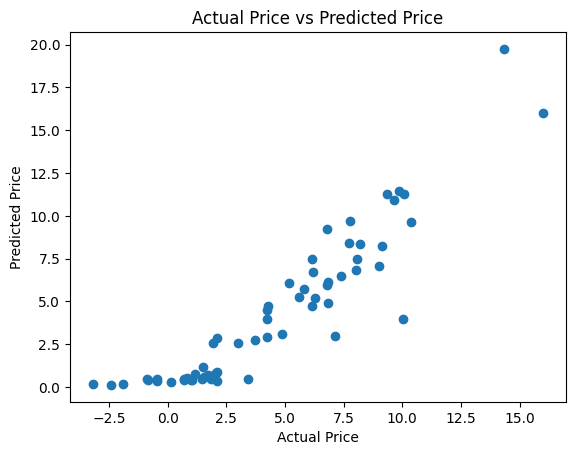

In [154]:
plt.scatter(y_pred_test, y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

In [157]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [159]:
y_pred_lasso=lasso_model.predict(X_test)

In [161]:
r2Score = r2_score(y_pred_lasso, y_test)
r2Score

0.7717678246278714

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

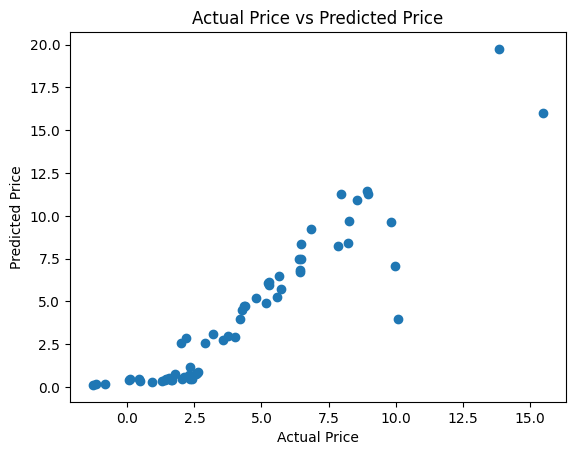

In [165]:
plt.scatter(y_pred_lasso, y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')